# Avaliação








1. Crie uma função que recebe uma lista e retorna o valor máximo e mínimo da lista (não utilize a função max() e min()).


In [1]:
from typing import List
from typing import Tuple
import numpy as np

import functools

def get_maximo_e_minimo(lista : List[int]) -> Tuple[int]:
  maximo = functools.reduce(lambda x1, x2: x1 if x1 > x2 else x2, lista)
  minimo = functools.reduce(lambda x1, x2: x1 if x1 < x2 else x2, lista)
  return (maximo, minimo) 

lista = np.arange(10)
maximo, minimo = get_maximo_e_minimo(lista)
assert maximo == 9
assert minimo == 0

2. Crie uma função que recebe dois parâmetros (início e fim) e retorna uma lista com todos os valores pares entre ínicio e fim.


In [2]:
def get_pares_entre_inclusive_limites(inicio : int, fim: int) -> List[int]:
  return [x for x in range(inicio, fim + 1) if x % 2 == 0]

pares = get_pares_entre_inclusive_limites(0, 10)
assert pares == [0, 2, 4, 6, 8, 10]

3. Acesse a nota de matemática em dc3 e altere para 3.


In [3]:
dc3 = { 
   "turma":{ 
      "aluno":{ 
         "nome":"Joao",
         "notas":{ 
            "portugues":2,
            "matematica":9
         }
      }
   }
}


In [4]:
dc3["turma"]["aluno"]["notas"]["matematica"] = 3
dc3["turma"]["aluno"]["notas"]["matematica"]

3


Para as questões 4 a 8 utilize o dataset 'water_potability.csv'. O dataset descreve características de uma amostra de água e na coluna 'potability' descreve se a água é ou não própria para consumo humano. Para iniciar a resolução das questões abaixo drope a coluna 'Unnamed: 0'.



In [5]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/k3lvin-os/avaliacao1qads/main/water_potability.csv", sep=";", usecols=np.arange(1, 13), index_col='sample_id')

In [6]:
df.head(1)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,state
sample_id,,,,,,,,,,,
4b4962b9-fed5-492e-9d28-50d954937c3f,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.99097,2.963135,0,Pennsylvania


In [7]:
df.shape

(3276, 11)

4. Demonstre a correlação entre todas as colunas do dataset. Qual é a coluna com maior correlação positiva com 'potability'? Desconsidere a correlação com ela mesma (valor 1.0).

In [8]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


Para encontrar a maior correlação entre colunas distintas, vamos pegar o valor absoluto das correlações, desfazer a tabulação e ordenar. Desconsideraremos os valores igual 1, então, vamos pegar o último elemento da serie

In [9]:
corr = df.corr().abs().unstack().sort_values(kind="quicksort")
corr[corr != 1][-2:-1]

Solids  Sulfate    0.171804
dtype: float64

A maior correlação é entre Solids-Sulfate e trata-se de uma correlação negativa

In [10]:
df.corr().loc["Sulfate", "Solids"]

-0.1718042747019931


5. Crie uma série que descreve (em porcentagem) quanto cada coluna tem de valores nulos. Qual a coluna com maior porcentagem de valores nulos?

In [11]:
serie = round(df.isna().sum()[df.isna().sum() != 0] / df.shape[0] * 100, 2) 
serie

ph                 14.99
Sulfate            23.84
Trihalomethanes     4.95
dtype: float64

A coluna com maior porcentagem de nulos é a Sulfate. Uma curiosidade é caso droparmos os valores nulos perderemos 38,61% da distribuição

In [12]:
round(100 - (df.dropna().shape[0] / df.shape[0] * 100), 2)

38.61


6. Crie uma coluna dentro do dataset que descreve se 'Turbidity' está acima ou abaixo da média.

Criação da coluna

In [13]:
df['Turbidity_acima'] = df['Turbidity'] >  df['Turbidity'].mean()

Valor da média

In [14]:
df['Turbidity'].mean()

3.9667861697910576

Demonstração

In [15]:
df[['Turbidity', 'Turbidity_acima']].head(5)

,Turbidity,Turbidity_acima
sample_id,,
4b4962b9-fed5-492e-9d28-50d954937c3f,2.963135,False
f1099b93-9195-4bd5-90b7-f0c191a74619,4.500656,True
5bc660ce-c94c-4631-b69b-b937be4ab7bb,3.055934,False
fa912705-9dc8-4224-b5f8-f315f31070a6,4.628771,True
1761ae51-da0d-40af-bb86-50819ac3d1bc,4.075075,True


7. Quantas amostras de água são potáveis e não potáveis, utilize a coluna criada na questão 6 como dimensão de análise.

In [16]:
df.groupby('Turbidity_acima', group_keys=False)['Potability'].value_counts()

Turbidity_acima  Potability
False            0             1012
                 1              648
True             0              986
                 1              630
Name: Potability, dtype: int64

Para turbidez (Turbidity) acima da média, 630 amostras são potáveis contra 986.
Para turbidez abaixo da média,  648 amostras são potáveis contra 1012.

8. Crie um dataframe onde o índice deve ser cada estado e com duas colunas. A primeira é a porcentagem de amostras não potáveis naquele estado e a segunda é a porcentagem de amostras potáveis naquele estado. Qual é o estado com a menor porcentagem de amostras de água potável?

In [17]:
estados_df = df.groupby(['state', 'Potability'], group_keys=False).size().unstack().rename({0: "nao_potavel", 1: "potavel"}, axis=1).reset_index()
estados_df.columns.name = None
estados_df.head()

,state,nao_potavel,potavel
0,Alabama,30,24
1,Alaska,36,32
2,Arizona,43,28
3,Arkansas,36,29
4,California,40,26


9. Utlizando dados coletados da internet sobre a quantidade de habitantes de cada estado no ano 2020 responda. Qual estado, com populacao acima de 10 milhões de habitantes, tem a maior porcentagem de amostras de águas não potável?

In [18]:
populacao_df = pd.read_excel("https://www2.census.gov/programs-surveys/decennial/2020/data/apportionment/apportionment-2020-tableA.xlsx", header=4, usecols=[0, 2])
populacao_df.columns = ['state', 'population']
populacao_df.head(1)

,state,population
0,Alabama,5024279.0


In [19]:
populacao_df_acima_10m = populacao_df[populacao_df.population > 10000000][populacao_df.state != 'U.S. Total'][ populacao_df.state != 'U.S. Total and Puerto Rico']
populacao_df_acima_10m

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,state,population
4,California,39538223.0
9,Florida,21538187.0
10,Georgia,10711908.0
13,Illinois,12812508.0
22,Michigan,10077331.0
32,New York,20201249.0
33,North Carolina,10439388.0
35,Ohio,11799448.0
38,Pennsylvania,13002700.0
43,Texas,29145505.0


In [20]:
estados_df[estados_df.state.isin(populacao_df_acima_10m.state.to_list() )].sort_values('nao_potavel').tail(1)

,state,nao_potavel,potavel
31,New York,47,20



10. Crie o dicionário dc_states contendo como chaves os nomes de cada estado e como valor uma lista contendo o zscore aplicado a coluna "Solids" de todas as amostras daquele respectivo estado. Passe para função violin_plot_states o dicionário e uma lista contendo 5 estados que gostaria de análisar. Faça uma análise sucinta do resultado do gráfico.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def violin_plot_states(dc_states,lista_estados):
    f, ax = plt.subplots(1,1,figsize=(16,4))
    data_plot = pd.DataFrame.from_dict(dc_states,orient='index').T.melt().rename(columns={'variable':'state','value':'z_score'})
    states_plot = lista_estados
    sns.violinplot(x='state',y='z_score',data=data_plot[data_plot.state.isin(states_plot)])    
    ax.axhline(0,color='black',alpha=0.3)

In [26]:

import math

def z_score(x, mean, sd):
  return (x - mean) / sd

def avg(terms):
  return sum(terms) / len(terms)

def variancia(dados, amostral = False):
    n = len(dados)
    media = sum(dados) / n
    return sum((x - media) ** 2 for x in dados) / (n - int(amostral))

def desvio_padrao(dados, amostral = False):
  d2 = variancia(dados, amostral)
  d = math.sqrt(d2)
  return d

def z_score_lista(lista):
  media = avg(lista)
  desvio_padrao_calculado = desvio_padrao(lista)
  return list(map(lambda x: z_score(x, media, desvio_padrao_calculado), lista))



In [48]:
dc_states = {state: z_score_lista( df[df.state == state].Solids) for state in df.state.unique()}

In [56]:
cinco_estados = populacao_df_acima_10m.sort_values('population').tail(5).state.to_list()
cinco_estados

['Pennsylvania', 'New York', 'Florida', 'Texas', 'California']

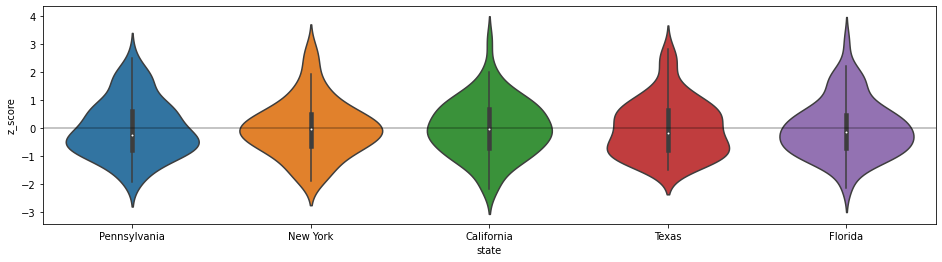

In [58]:
violin_plot_states(dc_states, cinco_estados)

A diferença interquartílica entre os estados no que se refere a sólidos na água é semelhante. Temos mais outliers em Califórnia e Florida, talvez por serem os estados mais populosos; já Nova York, Florida e Pensilvânia tem maior concetração de amostras na distribuição na distribuição interquartílica. uma hipótese é por uma possível maior padronização da água disponibilizada nessas regiões